In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statistics as stat
import scipy.stats as stats
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
df = pd.read_csv('SImplyHired_cleaned_data_updated.csv')
pd.options.display.max_columns = None
df.head()

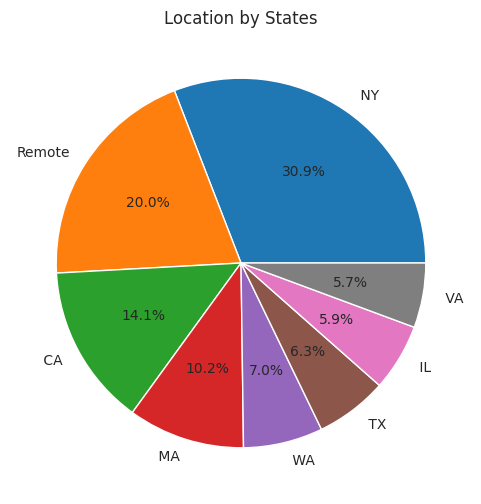

In [ ]:
#pie chart

#clean
y = df['state'].value_counts()
# only want the first 11 values
states_to_keep = ['Remote', ' CA', ' VA', ' WA', ' MA', ' NY', ' TX', ' IL']
# Filter the DataFrame
filtered_df = df[df['state'].isin(states_to_keep)]
filtered_df['state'].value_counts()

#plot
y = filtered_df['state'].value_counts()
labels = filtered_df['state'].unique()

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.title('Location by States')
plt.show()

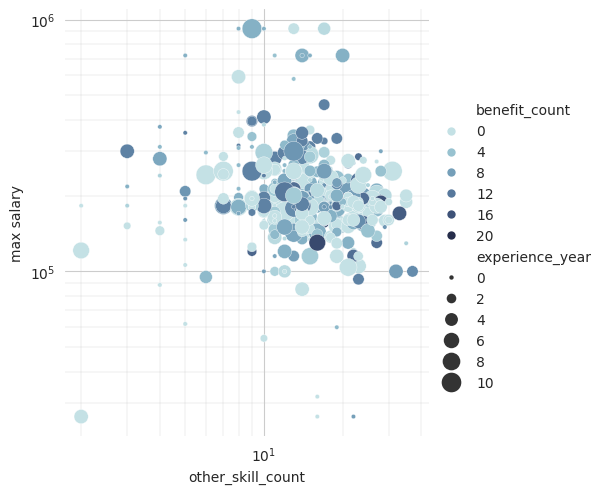

In [ ]:
# Scatterplot

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=filtered_df,
    x="other_skill_count", y="max salary",
    hue="benefit_count", size="experience_year",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [ ]:
# make new column for avg salary

filtered_df['Average_Salary'] = (filtered_df['trans min salary'] + filtered_df['trans max salary']) / 2


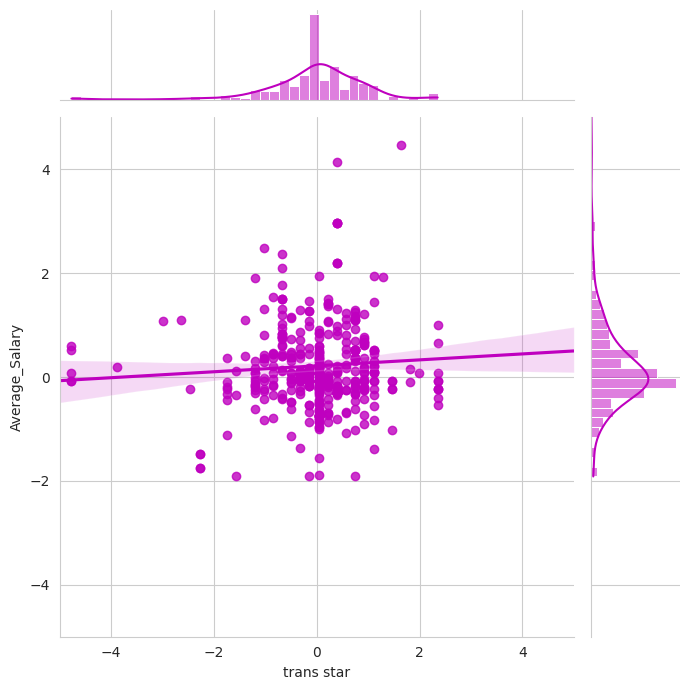

In [ ]:
# Linear regression with marginal distributions
g = sns.jointplot(x="trans star", y="Average_Salary", data=filtered_df,
                  kind="reg", truncate=False,
                  xlim=(-5, 5), ylim=(-5, 5),
                  color="m", height=7)

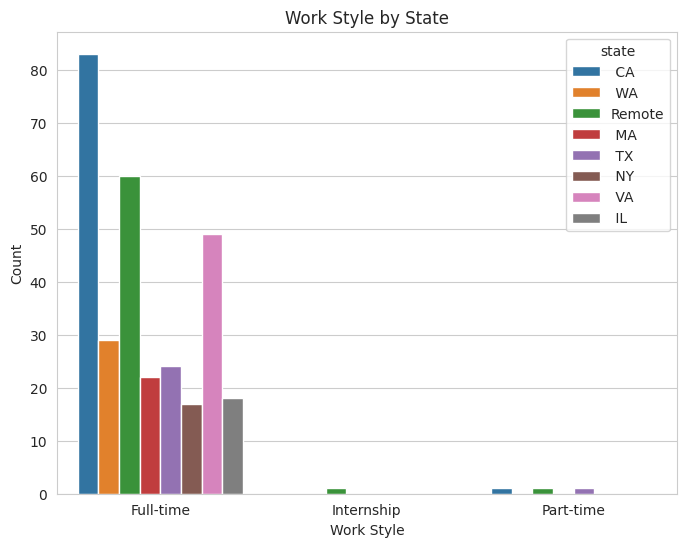

In [ ]:
# bar chart

#clean
filtered_df['work_style'].unique()
keep = ['Full-time', 'Part-time', 'Internship']
filtered_df1 = filtered_df[filtered_df['work_style'].isin(keep)]

#plot
plt.figure(figsize=(8, 6))
sns.countplot(x = filtered_df1["work_style"],
              hue = filtered_df1["state"],
              data = filtered_df1)
plt.title('Work Style by State')
plt.xlabel('Work Style')
plt.ylabel('Count')
plt.show()

In [ ]:
df1 = pd.read_csv('LinkedIn_cleaned_data.csv')
df1.head()

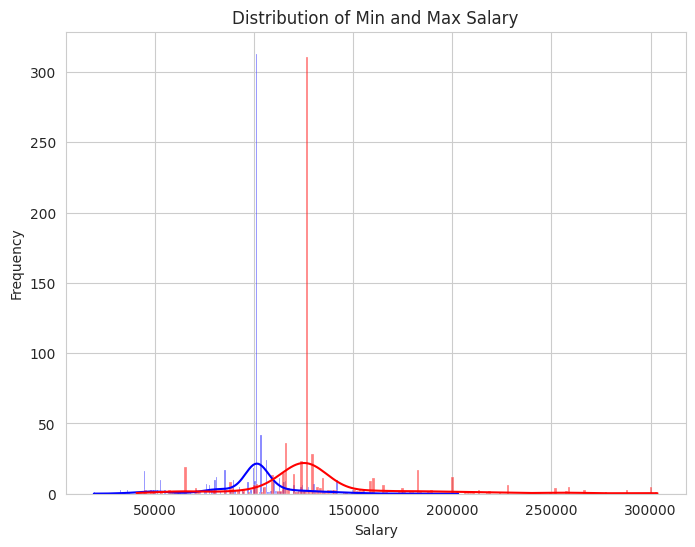

In [ ]:
# histogram
plt.figure(figsize=(8, 6))
sns.histplot(x = df1["min salary"], color="blue", label="Min Salary", kde = True)
sns.histplot(x = df1["max salary"], color="red", label="Max Salary", kde = True)

plt.title('Distribution of Min and Max Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# clean
duplicates = df1.duplicated().sum()
if duplicates > 0:
    df1.drop_duplicates(inplace=True)


#  labeled intervals Plot

# plot
df1["start"] = pd.to_datetime(df1["start"])
df1["stop"] = pd.to_datetime(df1["stop"])

cap, start, stop = df1['caption'], df1['start'], df1['stop']

#Check the status, because we paint all lines with the same color
#together
is_ok = (df1['state'] == 'OK')
not_ok = np.logical_not(is_ok)

#Get unique captions and there indices and the inverse mapping
captions, unique_idx, caption_inv = np.unique(cap, 1, 1)

#Build y values from the number of unique captions.
y = (caption_inv + 1) / float(len(captions) + 1)

#Plot function
def timelines(y, xstart, xstop, color='b'):
    """Plot timelines at y from xstart to xstop with given color."""
    plt.hlines(y, xstart, xstop, color, lw=4)
    plt.vlines(xstart, y+0.03, y-0.03, color, lw=2)
    plt.vlines(xstop, y+0.03, y-0.03, color, lw=2)


#Setup the plot
ax = plt.gca()

#To adjust the xlimits a timedelta is needed.
delta = (stop.max() - start.min())/10

plt.yticks(y[unique_idx], captions)
plt.ylim(0,1)
plt.xlim(start.min()-delta, stop.max()+delta)
plt.xlabel('Time')
plt.show()

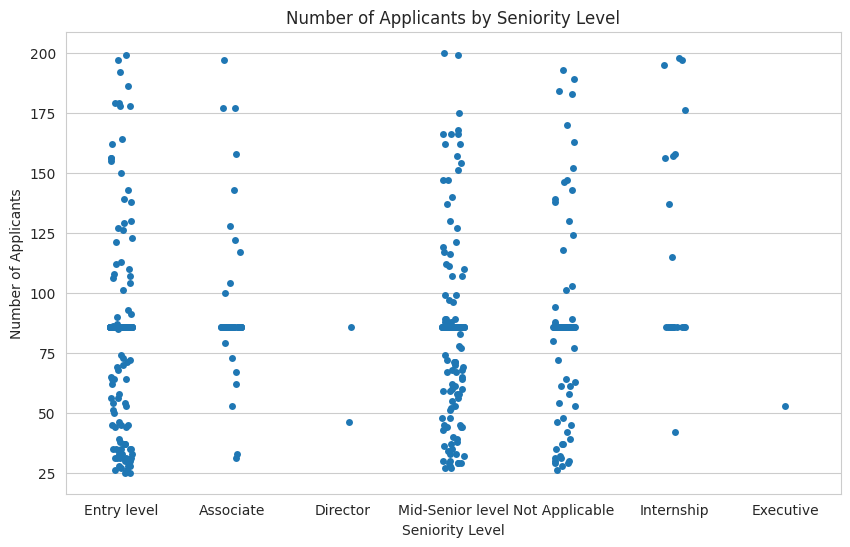

In [ ]:
df1['Seniority level'].unique()

# stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Seniority level', y='num_applicants', data=df1)
plt.title('Number of Applicants by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Applicants')
plt.show()

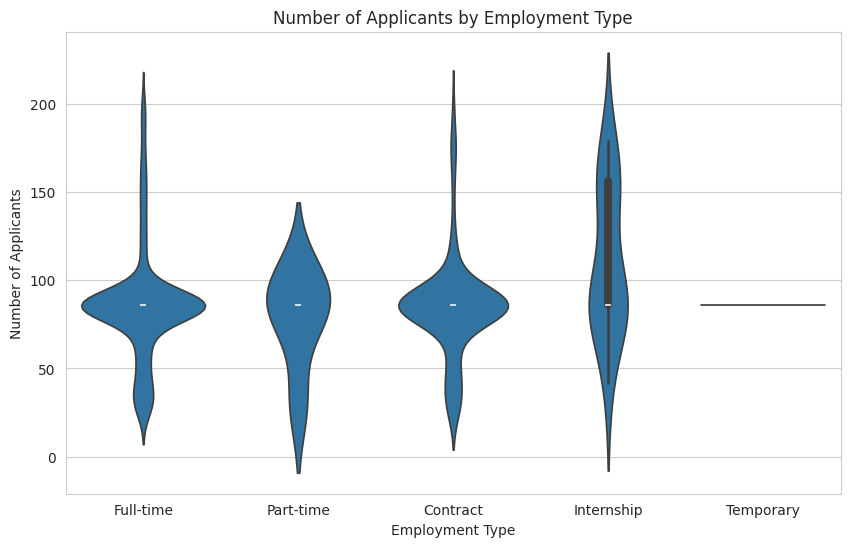

In [ ]:
df1['Employment type'].unique()

# violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Employment type', y='num_applicants', data=df1)
plt.title('Number of Applicants by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Applicants')
plt.show()